<p> <img src="https://mood-h2020.eu/wp-content/uploads/2020/10/logo_Mood_cmjn_black-1.jpg" width="15%";"/></p> 

## **Risk Mapping Dashboard: From text to Spatial Mapping** 









**Mehtab Alam Syed**



**MOOD Summer School 2023**

---

# Summary

In this practical session, we will explore the process of transforming the Avian-Influenza article dataset into an informative dashboard using various visualizations. Specifically, we will focus on extracting location information from the text of the articles to create visual representations such as word clouds, top 10 countries, heatmap, map clusters, and choropleth maps, time-series heatmap.

During this session, our primary objective is not to assess the accuracy of individual events but rather to emphasize on the extraction of location data from the article dataset. By leveraging different techniques, we can uncover valuable insights and trends related to Avian Influenza outbreaks across different regions.

Through the application of visualization methods, we aim to present a comprehensive overview of the geographic distribution of these events. This will facilitate a deeper understanding of the global impact of Avian Influenza and its potential spread.

By the end of this session, participants will gain practical experience in location extraction, data transformation, and the creation of visually informative dashboards using the Avian-Influenza article dataset. 

An overview of the practical is shown in Figure below:

<p> <img src="https://drive.google.com/uc?export=download&id=1MeTWMtdaKtFONImz_XC_m_5L5Eevi9JG" width="100%";"/></p> 




#Installing and Importing Necessary Libraries

## Installing Necessary Libraries

In [ ]:
!pip install geopy
!pip install pycountry
!pip install reverse-geocode
!pip install country-converter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 73.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=e5fbed4b0606f454155dbcf7fedac8fae7882492e2e627305c581abd42ae6b08
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for reverse-geocode: filename=reverse_geocode-1.4.1

## Importing Necessary Libraries
  




The libraries used for preparation of this notebook:

> 


*   **pandas** for data Manipulation of CSV, Excel etc...
*   **SpaCy** is an open-source library for natural language processing (NLP). SpaCy provides a wide range of NLP functionality, including tokenization, part-of-speech tagging, named entity recognition, dependency parsing, and text classification. 

*   **GeoPy** for Geocoding services e.g. Reverse geocoding i.e. from location to lat/lng, ISO3 coding of countries etc...
* **matplotlib** and **seaborn** are python charts libraries
* **folium** and its plugins are used for different geographical maps visualization e.g. Map clustering, Heatmaps and time-series heatmaps data.
* **wordcloud** is used to visualize the spatial information
* **plotly** is library to visualize chropleth map from ISO country codes.  

In [ ]:
import pandas as pd
import numpy as np
import spacy
import geopy 
from geopy.extra.rate_limiter import RateLimiter
from geopy.geocoders import Nominatim
import pycountry
import matplotlib.pyplot as plt # library for ploting data
import seaborn as sns # library for visualization
from wordcloud import WordCloud, ImageColorGenerator
import reverse_geocode
import ast
from PIL import Image
import urllib.request
from collections import Counter
import country_converter as coco
import plotly.express as px
import folium
import folium.plugins as plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings('ignore')

# Datasets

**Avian-Influenza Dataset:**

The first dataset about the articles that contain events of Avian-Influenza extracted from PADI-web for the period 2018-2019 around the world. You can download the dataset from this **[link](https://drive.google.com/uc?export=download&id=1zIjfy-8exo7Fv111hOHDzonyE9D8j81c).**


The dataset containin 438 articles with following information: 
*   **id**: unique identifier of the article 
*   **title**: title of the article 
*   **text**: article text 
*   **url**: url of the source  
*   **type**: article is relevant/irrelevant e.g. relevant if it contain event(s)  
*  **treated** Manually treated by expert 
*  **published_at** date when the article was published online 
* **source** online article source 

__________________________________________________________________________



**Optional: West-Nile Virus (WNV) Europe Dataset:**

This dataset is about the articles contains the outbreaks of West-Nile Virus (WNV) extracted from PADI-web in Europe. Maybe we have the locations is outside of the Europe in it with some reference to the outbreaks but we are not concerned in the accuracy of the outbreak. You can download the dataset from this **[link](https://drive.google.com/uc?export=download&id=1GxkNcT4xviP5Yta0MMxPhLCHpyjleISO).** 

The information in the articles are more or less same with some extra information too ☺️. 

In [ ]:
#https://drive.google.com/uc?export=download&id=1GxkNcT4xviP5Yta0MMxPhLCHpyjleISO --- Dataset of WNV outbreaks in Europe

df = pd.read_csv('https://drive.google.com/uc?export=download&id=1zIjfy-8exo7Fv111hOHDzonyE9D8j81c', sep=',') # read our dataset
df['published_at'] = pd.to_datetime(df['published_at']).dt.date  #format the date by removing time
df.head(5)

,type,id,title,url,source,text,published_at,treated,Unnamed: 8
0,relevant,5340f7ff9e,Bird flu scare sends thousands of ducklings to...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,VnExpress International,Bird flu scare sends thousands of ducklings to...,2018-08-02,done,NaN
1,relevant,62c651df87,Vietnam reports three outbreaks of highly path...,https://www.reuters.com/article/us-health-bird...,Reuters,Vietnam reports three outbreaks of highly path...,2018-08-03,done,NaN
2,relevant,5OEBL52G86,Bird flu returns to Vietnam: Hundreds of birds...,https://www.express.co.uk/news/world/998631/bi...,Express.co.uk,Vietnam has reported three outbreaks of highly...,2018-08-03,done,NaN
3,relevant,4362a50243,Bird flu returns to Vietnam: Hundreds of birds...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,Express.co.uk,Bird flu returns to Vietnam: Hundreds of birds...,2018-08-03,duplicate,NaN
4,relevant,e16b6b144a,Deadly bird flu RETURNS: Hundreds of birds KIL...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,Express.co.uk,Bird flu returns to Vietnam: Hundreds of birds...,2018-08-03,duplicate,NaN


# (Optional) Installation of SpaCy Models

> 


There are several SpaCy language model i.e. **en_core_web_sm**, **en_core_web_md**, **en_core_web_lg** and **en_core_web_trf**.

For reference: [https://spacy.io/models/en](https://spacy.io/models/en)

By default, One can use SpaCy **en_core_web_sm** without downloading it. However, for acheiving more accuracy one can download other language models through below step.




In [ ]:
import spacy.cli
spacy.cli.download("en_core_web_md") #en_core_web_lg, en_core_web_trf

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


# Initalialization of SpaCy and GeoPy 

>

1. The code snippet loads the "en_core_web_sm" model from the spaCy library for natural language processing (NLP) tasks.

2. Initializes a geolocator object from the Nominatim class with a specified user agent and timeout value. The geolocator will be used for reverse geocoding e.g. place_name -> (lat, lng)

In [ ]:
nlp = spacy.load("en_core_web_sm")
geolocator = Nominatim(user_agent="DashboardApp", timeout=7)
#geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Methods for extraction of Place names, (lat,lng) and country names from text 
>

**Method 1**: Extract places from text through SpaCy library.

**Method 2**: This method is used to get (lat,lng) and country name from place names. Furthermore, it is saved in the same dataframe.

In [ ]:
index = 0
'''
Method 1: Extract places from text through SpaCy library
'''
def get_place_names(text):
  doc = nlp(text)
  places = [e.text for e in doc.ents if e.label_ in ('GPE', 'LOC')]
  return places 
'''
Method 2: This method is used to get (lat,lng) and country name from place names. Furthermore, it is saved in the same dataframe.
'''
def save_places_in_dataframe(text):
  global index 
  locations = []
  countries = []
  places = get_place_names(text)
  for pl in places:
      location = geolocator.geocode(pl)
      
      if location is not None:
        lat, longitude = round(location.latitude, 6) , round(location.longitude, 6)
        loc = (lat, longitude)
        country = reverse_geocode.search([loc])[0]['country']
        countries.append(country)
        locations.append(loc)
  df.loc[index, 'place_name'] = str(places)
  df.loc[index, 'lat_lng'] = str(locations)
  df.loc[index, 'country'] = str(countries)
  index = index + 1
  

# Getting place names, (lat,lng) and country names using Method 1 and Method 2

In Line 2, We call **Method 2** to extract locations , (lat, lng) and country and save in dataframe.

In [ ]:
df = df.head(100) 
df['text'].apply(save_places_in_dataframe) # It might take 5-7 minutes for (100 rows) due to reverse geocoding from Nominatim API
df.head(5)

,type,id,title,url,source,text,published_at,treated,Unnamed: 8,place_name,lat_lng,country
0,relevant,5340f7ff9e,Bird flu scare sends thousands of ducklings to...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,VnExpress International,Bird flu scare sends thousands of ducklings to...,2018-08-02,done,NaN,"['Vietnam', 'Nghe An Province', 'Hai Phong', '...","[(15.926666, 107.965086), (19.1976, 105.060676...","['Vietnam', 'Vietnam', 'Vietnam', 'Vietnam', '..."
1,relevant,62c651df87,Vietnam reports three outbreaks of highly path...,https://www.reuters.com/article/us-health-bird...,Reuters,Vietnam reports three outbreaks of highly path...,2018-08-03,done,NaN,"['Vietnam', 'Vietnam', 'Paris', 'Nghe An', 'Ha...","[(15.926666, 107.965086), (15.926666, 107.9650...","['Vietnam', 'Vietnam', 'France', 'Vietnam', 'V..."
2,relevant,5OEBL52G86,Bird flu returns to Vietnam: Hundreds of birds...,https://www.express.co.uk/news/world/998631/bi...,Express.co.uk,Vietnam has reported three outbreaks of highly...,2018-08-03,done,NaN,"['Vietnam', 'Paris', 'Nghe An', 'Hai Phong', '...","[(15.926666, 107.965086), (48.853495, 2.348391...","['Vietnam', 'France', 'Vietnam', 'Vietnam', 'V..."
3,relevant,4362a50243,Bird flu returns to Vietnam: Hundreds of birds...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,Express.co.uk,Bird flu returns to Vietnam: Hundreds of birds...,2018-08-03,duplicate,NaN,"['Vietnam', 'Vietnam', 'vietnam', 'Paris', 'Ng...","[(15.926666, 107.965086), (15.926666, 107.9650...","['Vietnam', 'Vietnam', 'Vietnam', 'France', 'V..."
4,relevant,e16b6b144a,Deadly bird flu RETURNS: Hundreds of birds KIL...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,Express.co.uk,Bird flu returns to Vietnam: Hundreds of birds...,2018-08-03,duplicate,NaN,"['Vietnam', 'Vietnam', 'vietnam', 'Paris', 'Ng...","[(15.926666, 107.965086), (15.926666, 107.9650...","['Vietnam', 'Vietnam', 'Vietnam', 'France', 'V..."


# Calculation of frequency of countries and ISO3 code



1.   Aggregate lists of locations into one list
2.   Calculation of Country frequencies
3.   Getting country ISO3 codes to show on Choropleth map



In [ ]:
country_col = df['country'].to_list()
countries_list = [item for sublist in country_col for item in ast.literal_eval(sublist)]
countries_names = " ".join(countries_list)
lat_lng_col = df['lat_lng'].to_list()
lat_lng_list = [item for sublist in lat_lng_col for item in ast.literal_eval(sublist)]
counted = Counter(countries_list)
word_freq = pd.DataFrame(counted.items(),columns=['Country','Frequency']).sort_values(by='Frequency',ascending=False)
cc = coco.CountryConverter()
word_freq['iso3'] = cc.pandas_convert(series=word_freq['Country'], to='ISO3') 
  

# Country Word Cloud: Visualizing Textual Representation

**Method Word Cloud**: This method generate word cloud from text(string)

In [ ]:
'''
Method Word Cloud: This method generate word cloud from text(string)
'''
def generate_wordcloud(text, title, ax):
  urllib.request.urlretrieve('https://mood-h2020.eu/wp-content/uploads/2022/02/MOOD-Cases-Webpage-Disease-Icons-2.png', 'avian_influenza')
  chicken_mask = np.array(Image.open('avian_influenza'))
  
  # Colors
  image_colors = ImageColorGenerator(chicken_mask)
  wordcloud = WordCloud(background_color='white', repeat = True, collocations=False, mask = chicken_mask).generate(text)
  ax.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
  ax.axis("off")
  ax.set_title(title, fontdict = {'fontsize':16})

# Statistical Analysis: Top 10 Countries by Frequency

**Method frequent countries**: Generate a bar graph for top 10 most frequent countries


In [ ]:
'''
Method frequent countries: Generate a bar graph for top 10 most frequent countries
'''
def generate_frequent_countries(title,ax):
  ax.set_title(title)
  sns.barplot(ax=ax,x='Frequency',y='Country',data= word_freq.head(10))

# Exploring Frequency: Word Cloud and Bar Graph of Top 10 Countries

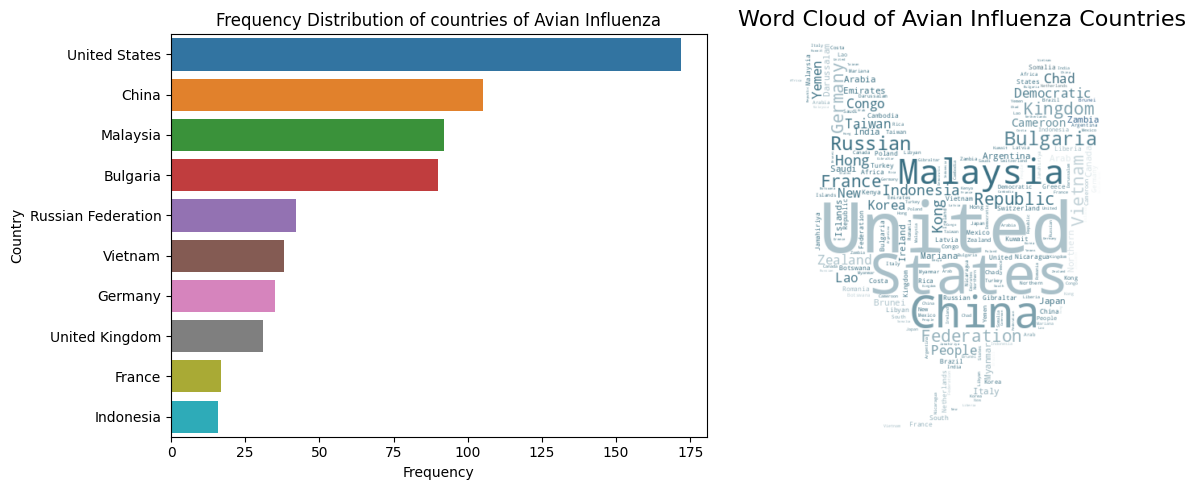

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12.5,5)) # width, height
generate_frequent_countries("Frequency Distribution of countries of Avian Influenza", ax[0])
generate_wordcloud( countries_names, "Word Cloud of Avian Influenza Countries", ax[1])
fig.tight_layout()
fig.show()


# Visualization of Choropleth Map of countries frequency distribution


The visualization of a choropleth map is an effective way to represent the frequency distribution of countries in a dataset. In this context, we can create a choropleth map that displays the frequency or occurrence of Avian Influenza events across different countries.

By utilizing color gradients or shades, the choropleth map can visually highlight the variation in occurrence levels among countries. Countries with a higher frequency of Avian Influenza events will be depicted with darker or more intense colors, while those with lower frequencies will have lighter or less intense colors.

In [ ]:
fig_choropleth = px.choropleth(word_freq, locations="iso3",
                        color="Frequency", # Change to Count/frequency 
                        hover_name="Country", # column to add to hover information (Quantiles)
                        color_continuous_scale=px.colors.sequential.Plasma)
fig_choropleth.update_layout(title_text = "Choropleth map of Avian-Influenza countries frequency distribution ", title_x=0.5)
fig_choropleth.show()


# Conversion of (lat,lng) tuple to list for Heatmaps

The provided code converts a list of latitude-longitude tuples to a list of lists, where each list contains the latitude, longitude, and count values. It utilizes the Counter class to count the occurrences of each unique tuple and applies a list comprehension to transform the data.

In [ ]:
def tuple_to_list(i):
    return [i[0][0], i[0][1], i[1]]
count_latlng = Counter(lat_lng_list)

latlnglist = [tuple_to_list(i) for i in count_latlng.items()]
#print(latlnglist)

# Visualization of Heatmap of countries frequency distribution

The visualization of a heatmap is another effective way to represent the frequency distribution of countries in a dataset. In this case, we can create a heatmap that showcases the frequency or occurrence of Avian Influenza events across different countries. Higher frequencies are typically represented with darker or more intense colors, while lower frequencies are depicted with lighter or less intense colors. One can zoom in/zoom out to have more insight at different geographical hierarchy.

In [ ]:
loc = 'Heatmap: Frequency distribution of Avian Influenza around the globe'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)  
map = folium.Map(location=[37.643445,37.353536], zoom_start=3, width = 1300, height = 500,tiles='CartoDB positron')
map.get_root().html.add_child(folium.Element(title_html))
HeatMap(latlnglist).add_to(map)

map


# Visualizing Country Frequency Distribution with Map Clusters

The code generates a map clusters visualization to depict the frequency distribution of countries. It clusters the countries on a map based on their respective frequency values, offering an informative visual representation of the distribution patterns. One can zoom in/zoom out to have more insight at different geographical hierarchy.

In [ ]:
loc = 'Map clusters: Cluster of avian Influenza around the globe'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc)  
map = folium.Map(location=[37.643445,37.353536], zoom_start=3, width = 1300, height = 500,tiles='CartoDB positron')
 
marker_cluster = MarkerCluster().add_to(map)
map.get_root().html.add_child(folium.Element(title_html)) 
for tup in lat_lng_list:
    popup = 'Location <b>Name</b>'
    folium.Marker(list(tup), popup=popup).add_to(marker_cluster)
map


# Heatmap Visualization: Time Series Analysis of Avian-Influenza Outbreaks by Date

The code generates a heatmap visualization to analyze the time series data of Avian-Influenza outbreaks. It provides insights into the patterns and trends of outbreaks over time using a color-coded heatmap representation.

In [ ]:
loc = 'Heatpmap: Time series Data of Avian-Influenza outbreaks'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(loc) 
lat_lng_heatmaplist = []
data = []
df['published_at'] = df['published_at'].sort_values(ascending=True)
for _, d in df.groupby('published_at'): # Data manipulation by Date. For month : df.groupby(month('published_at'))
  for _, row in d.iterrows():
    temp   = ast.literal_eval(row['lat_lng'])
    lat_lng_heatmaplist.extend(temp)
  count_latlng_heatmap = Counter(lat_lng_heatmaplist)
  latlng_list_map = [tuple_to_list(i) for i in count_latlng_heatmap.items()]
  data.append(latlng_list_map)

date_time_list = df['published_at'].unique().tolist() #Unique list of dates
date_str_list = [date_obj.strftime('%Y-%m-%d') for date_obj in date_time_list] # Convert Dates into String format

heatmap = folium.Map(location=[37.643445,37.353536], zoom_start=3, width = 1300, height = 500, tiles='CartoDB positron')
heatmap.get_root().html.add_child(folium.Element(title_html)) 
hm = plugins.HeatMapWithTime(data, auto_play=True,
                             display_index=True,
                             index=date_str_list,
                             max_opacity=0.8)
hm.add_to(heatmap)
heatmap